(0, 0.7922185430463576)
gender prediction confusion matrix
[[0.61890244 0.38109756]
 [0.14318182 0.85681818]]


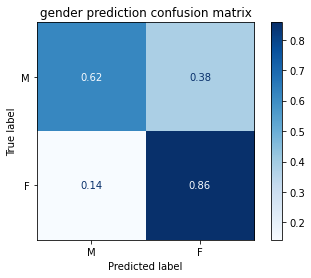

In [6]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
rating_matrix = pd.read_pickle(os.path.join('..', 'ml-1m', 'rating_matrix.pkl')).astype(int)
users = pd.read_pickle(os.path.join('..', 'ml-1m', 'users.pkl'))

users.set_index(users.user_id, inplace=True)

X = rating_matrix.values
y = users.gender.to_numpy()

models=[]
scores=[]
for train_ids, test_ids in ShuffleSplit(n_splits=1, test_size=0.2, random_state=20210511).split(X):
    x_train, x_test = X[train_ids], X[test_ids]
    y_train, y_test = y[train_ids], y[test_ids]
    model = LogisticRegression(solver='liblinear', C=0.05)
    classifier = model.fit(x_train, y_train)
    models.append(model)
    scores.append(model.score(x_test, y_test))

best_gender_model = models[max(enumerate(scores), key=lambda x:x[1])[0]]
print(max(enumerate(scores), key=lambda x:x[1]))
filename = 'LR_gender.pkl'
#pickle.dump(best_gender_model, open(filename, 'wb'))
class_names = ['M', 'F']
title='gender prediction confusion matrix'
disp = plot_confusion_matrix(best_gender_model, x_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true')
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

(0, 0.4826158940397351)
age prediction confusion matrix
[[0.3        0.325      0.225      0.075      0.025      0.025
  0.025     ]
 [0.0462963  0.55555556 0.3287037  0.06018519 0.00462963 0.00462963
  0.        ]
 [0.01415094 0.14386792 0.63207547 0.13915094 0.03066038 0.02358491
  0.01650943]
 [0.01293103 0.04310345 0.31896552 0.43965517 0.09913793 0.06034483
  0.02586207]
 [0.01041667 0.03125    0.14583333 0.30208333 0.29166667 0.14583333
  0.07291667]
 [0.0173913  0.02608696 0.13913043 0.23478261 0.1826087  0.25217391
  0.14782609]
 [0.01176471 0.         0.14117647 0.17647059 0.15294118 0.23529412
  0.28235294]]


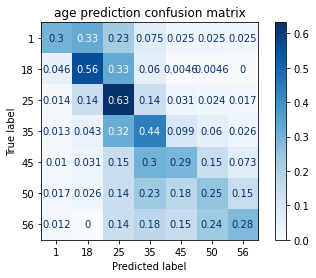

In [11]:
y = users.age.to_numpy()
models=[]
scores=[]
for train_ids, test_ids in ShuffleSplit(n_splits=1, test_size=0.2, random_state=20210511).split(X):
    x_train, x_test = X[train_ids], X[test_ids]
    y_train, y_test = y[train_ids], y[test_ids]
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=0.05, max_iter=4000)
    model.fit(x_train, y_train)
    models.append(model)
    scores.append(model.score(x_test, y_test))

best_age_model = models[max(enumerate(scores), key=lambda x:x[1])[0]]
print(max(enumerate(scores), key=lambda x:x[1]))
filename = 'LR_age.pkl'
#pickle.dump(best_age_model, open(filename, 'wb'))
class_names = np.unique(y)
title='age prediction confusion matrix'
disp = plot_confusion_matrix(best_age_model, x_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true')
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()


(0, 0.1605960264900662)
occupation prediction confusion matrix
[[0.14935065 0.11038961 0.05194805 0.00649351 0.16233766 0.00649351
  0.03896104 0.16233766 0.         0.01298701 0.         0.00649351
  0.03246753 0.00649351 0.05194805 0.00649351 0.04545455 0.11688312
  0.         0.         0.03246753]
 [0.11926606 0.20183486 0.01834862 0.00917431 0.11009174 0.
  0.0733945  0.13761468 0.         0.         0.00917431 0.00917431
  0.06422018 0.         0.03669725 0.00917431 0.03669725 0.11926606
  0.         0.         0.04587156]
 [0.18       0.16       0.06       0.         0.2        0.
  0.02       0.08       0.         0.         0.         0.
  0.04       0.         0.         0.         0.02       0.16
  0.02       0.         0.06      ]
 [0.24444444 0.15555556 0.11111111 0.         0.17777778 0.
  0.02222222 0.08888889 0.         0.         0.         0.
  0.04444444 0.04444444 0.06666667 0.         0.         0.02222222
  0.         0.         0.02222222]
 [0.13513514 0.0472973 

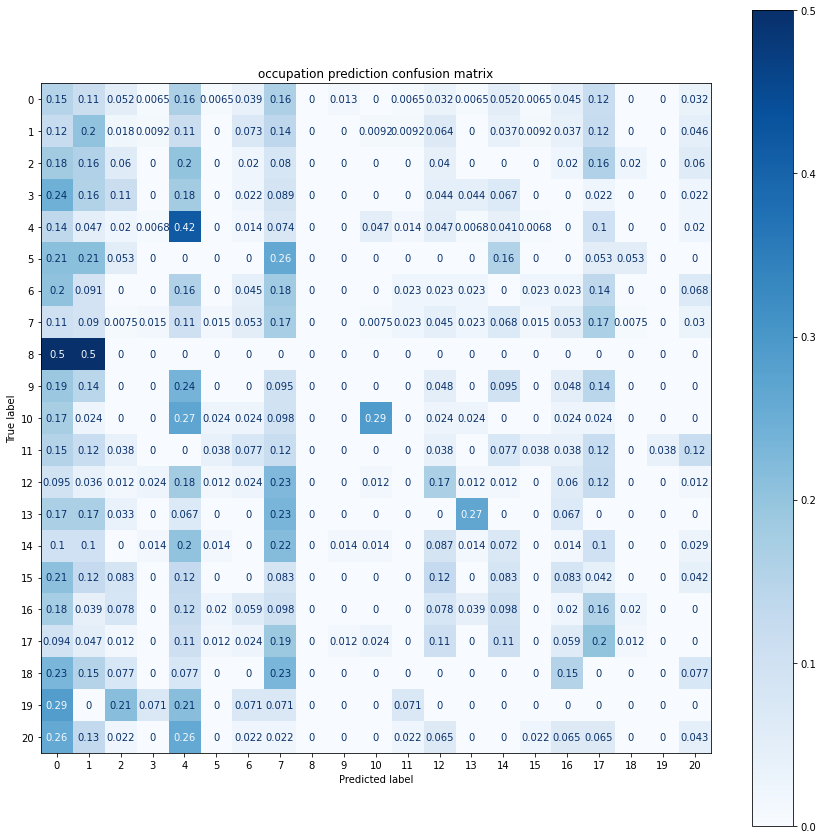

<Figure size 720x1080 with 0 Axes>

In [14]:

y = users.occupation.to_numpy()
models=[]
scores=[]
for train_ids, test_ids in ShuffleSplit(n_splits=1, test_size=0.2, random_state=20210511).split(X):
    x_train, x_test = X[train_ids], X[test_ids]
    y_train, y_test = y[train_ids], y[test_ids]
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=0.05, max_iter=4000)
    model.fit(x_train, y_train)
    models.append(model)
    scores.append(model.score(x_test, y_test))

best_occupation_model = models[max(enumerate(scores), key=lambda x:x[1])[0]]
print(max(enumerate(scores), key=lambda x:x[1]))
filename = 'LR_occupation.pkl'
#pickle.dump(best_occupation_model, open(filename, 'wb'))

class_names = np.unique(y)
title='occupation prediction confusion matrix'
fig, ax = plt.subplots(figsize=(15, 15))

disp = plot_confusion_matrix(best_occupation_model, x_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize='true', ax=ax)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)
plt.figure(figsize=(10,15))
plt.show()
